# Lab 4 coding problems

In [9]:
import context
import numpy as np
import json
from numlabs.lab4.example.do_example import get_init
from numlabs.lab4.lab4_functions import initinter41
import matplotlib.pyplot as plt

In [3]:
def derivs(coeff, y):
  f=np.empty_like(y) #create a 2 element vector to hold the derivitive
  f[0]=y[1]
  f[1]= -1.*coeff.c1*y[1] - coeff.c2*y[0]
  return f

### Problem A

In [4]:
def Heun(coeff, y, derivs):
  k1 = coeff.dt * derivs(coeff,y)
  k2 = coeff.dt * derivs(coeff,y + ((2/3) * k1))
  ynew = y + 0.25*k1 + 0.75*k2
  return ynew

In [16]:
coeff=get_init()
coeff

initvals(dt=0.1, c1=0.0, c2=1.0, t_beg=0.0, t_end=40.0, yinitial=[0.0, 1.0], comment='written Jan 29,2020', plot_title='simple damped oscillator run 1')

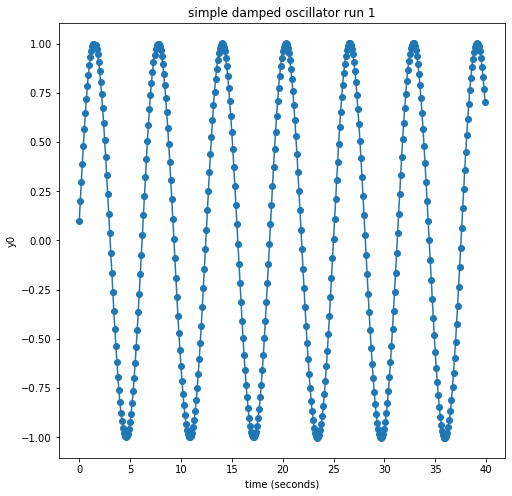

In [17]:
#
# integrate and save the result in savedata
#
time=np.arange(coeff.t_beg,coeff.t_end,coeff.dt)
y=coeff.yinitial
nsteps=len(time) 
savedata=np.empty([nsteps],np.float64)
for i in range(nsteps):
    y=Heun(coeff,y,derivs)
    savedata[i]=y[0]

theFig,theAx=plt.subplots(1,1,figsize=(8,8))
theAx.plot(time,savedata,'o-')
theAx.set_title(coeff.plot_title)
theAx.set_xlabel('time (seconds)')
theAx.set_ylabel('y0');

## Problem B
$$f(y,t) = t - y  + 1.0 = -y +t +1$$ <br>
.. which as far as i can tell is the same setup as many of the interactive examples earlier in the lab

In [76]:
initialVals={'yinitial': [0.0, 1.0],'t_beg':0.,'t_end':10.,'dt':0.1,'c1':-1.,'c2':1.,'c3':1.}
coeff = initinter41(initialVals)

In [77]:
def midpoint4(coeff, y, derivs):
  ynew = y + coeff.dt*derivs(coeff,y + (0.5 * coeff.dt * derivs(coeff,y)))
  return ynew

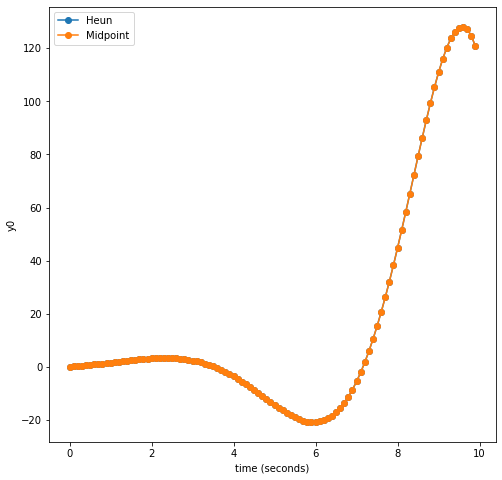

In [78]:
time=np.arange(coeff.t_beg,coeff.t_end,coeff.dt)

theFig,theAx=plt.subplots(1,1,figsize=(8,8))
# theAx.set_title(coeff.plot_title)
theAx.set_xlabel('time (seconds)')
theAx.set_ylabel('y0');

y=coeff.yinitial
nsteps=len(time) 
savedata=np.empty([nsteps],np.float64)
for i in range(nsteps):
    y=Heun(coeff,y,derivs)
    savedata[i]=y[0]

theAx.plot(time,savedata,'o-', label = 'Heun')

y=coeff.yinitial
nsteps=len(time) 
savedata=np.empty([nsteps],np.float64)
for i in range(nsteps):
    y=midpoint4(coeff,y,derivs)
    savedata[i]=y[0]

theAx.plot(time,savedata,'o-', label = 'Midpoint')
theAx.legend()

In [79]:
initialVals={'yinitial': [0.0, 1.0],'t_beg':0.,'t_end':10.,'dt':1,'c1':-1.,'c2':1.,'c3':1.}
coeff = initinter41(initialVals)

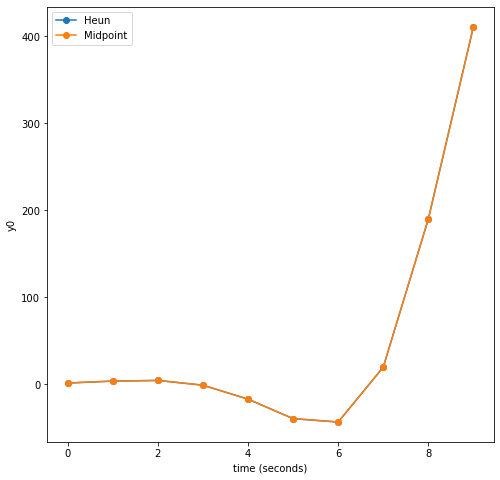

In [80]:
time=np.arange(coeff.t_beg,coeff.t_end,coeff.dt)

theFig,theAx=plt.subplots(1,1,figsize=(8,8))
# theAx.set_title(coeff.plot_title)
theAx.set_xlabel('time (seconds)')
theAx.set_ylabel('y0');

y=coeff.yinitial
nsteps=len(time) 
savedata=np.empty([nsteps],np.float64)
for i in range(nsteps):
    y=Heun(coeff,y,derivs)
    savedata[i]=y[0]

theAx.plot(time,savedata,'o-', label = 'Heun')

y2=coeff.yinitial
nsteps=len(time) 
savedata2=np.empty([nsteps],np.float64)
for i in range(nsteps):
    y2=midpoint4(coeff,y2,derivs)
    savedata2[i]=y2[0]

theAx.plot(time,savedata2,'o-', label = 'Midpoint')
theAx.legend()

In [63]:
savedata-savedata2

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

^as far as i can tell they lead to identical results which makes me think i've done somehting wrong! alas!

### Problem C

$$%    \textcolor[named]{Red}{\frac{dT}{dt}} = -\lambda \,
%    \textcolor[named]{Blue}{(T-T_a)} .
    \underbrace{\frac{dT}{dt}}_{\begin{array}{c} 
                                \mbox{rate of change}\\
                                \mbox{of temperature}
                                \end{array}}
    = -\lambda \underbrace{(T-T_a)}_{\begin{array}{c} 
                                \mbox{temperature}\\
                                \mbox{difference}
                                \end{array}} .$$
</div>
let y = T

In [74]:
lamb = -0.6
Ta = 25

initialVals={'yinitial': [0.0, 1.0],'t_beg':0.,'t_end':3.,'dt':0.1,'c1':-lamb,'c2':lamb*Ta,'c3':0.}
coeff = initinter41(initialVals)
coeff

initvals(dt=0.1, c1=0.6, c2=-15.0, c3=0.0, t_beg=0.0, t_end=3.0, yinitial=[0.0, 1.0])

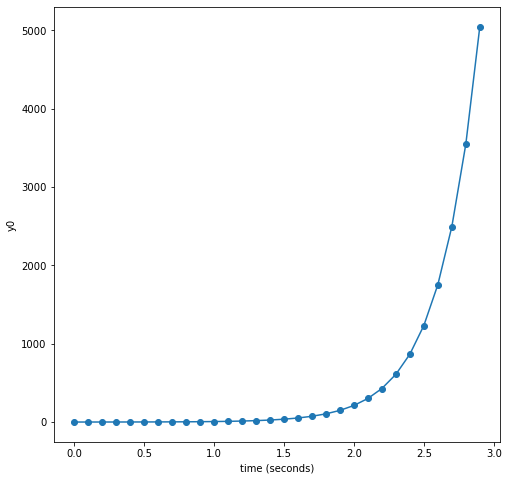

In [75]:
time=np.arange(coeff.t_beg,coeff.t_end,coeff.dt)

theFig,theAx=plt.subplots(1,1,figsize=(8,8))
# theAx.set_title(coeff.plot_title)
theAx.set_xlabel('time (seconds)')
theAx.set_ylabel('y0');

y=coeff.yinitial
nsteps=len(time) 
savedata=np.empty([nsteps],np.float64)
for i in range(nsteps):
    y=Heun(coeff,y,derivs)
    savedata[i]=y[0]

theAx.plot(time,savedata,'o-', label = 'Heun')